**1**

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from pathlib import Path

train_path = Path(r'c:\Users\PC\Downloads\mushrooms.csv')

df = pd.read_csv(train_path)

print("Nguyễn Thị Tường Vi - 6351071077")
print("Số lượng bản ghi ban đầu:", len(df))
print(df.head())


Nguyễn Thị Tường Vi - 6351071077
Số lượng bản ghi ban đầu: 8124
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0               

**2**

In [6]:
print("Nguyễn Thị Tường Vi - 6351071077")
print("Số giá trị NA per column:")
print(df.isna().sum())
df_clean = df.dropna().copy()
print("Sau dropna:", len(df_clean))
df_clean['dataset'] = 'all'



Nguyễn Thị Tường Vi - 6351071077
Số giá trị NA per column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Sau dropna: 8124


In [7]:
print("Nguyễn Thị Tường Vi - 6351071077")
print("Tổng sau nối (data):", len(df_clean))
df_clean.info()

Nguyễn Thị Tường Vi - 6351071077
Tổng sau nối (data): 8124
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below

**3**

Nguyễn Thị Tường Vi - 6351071077


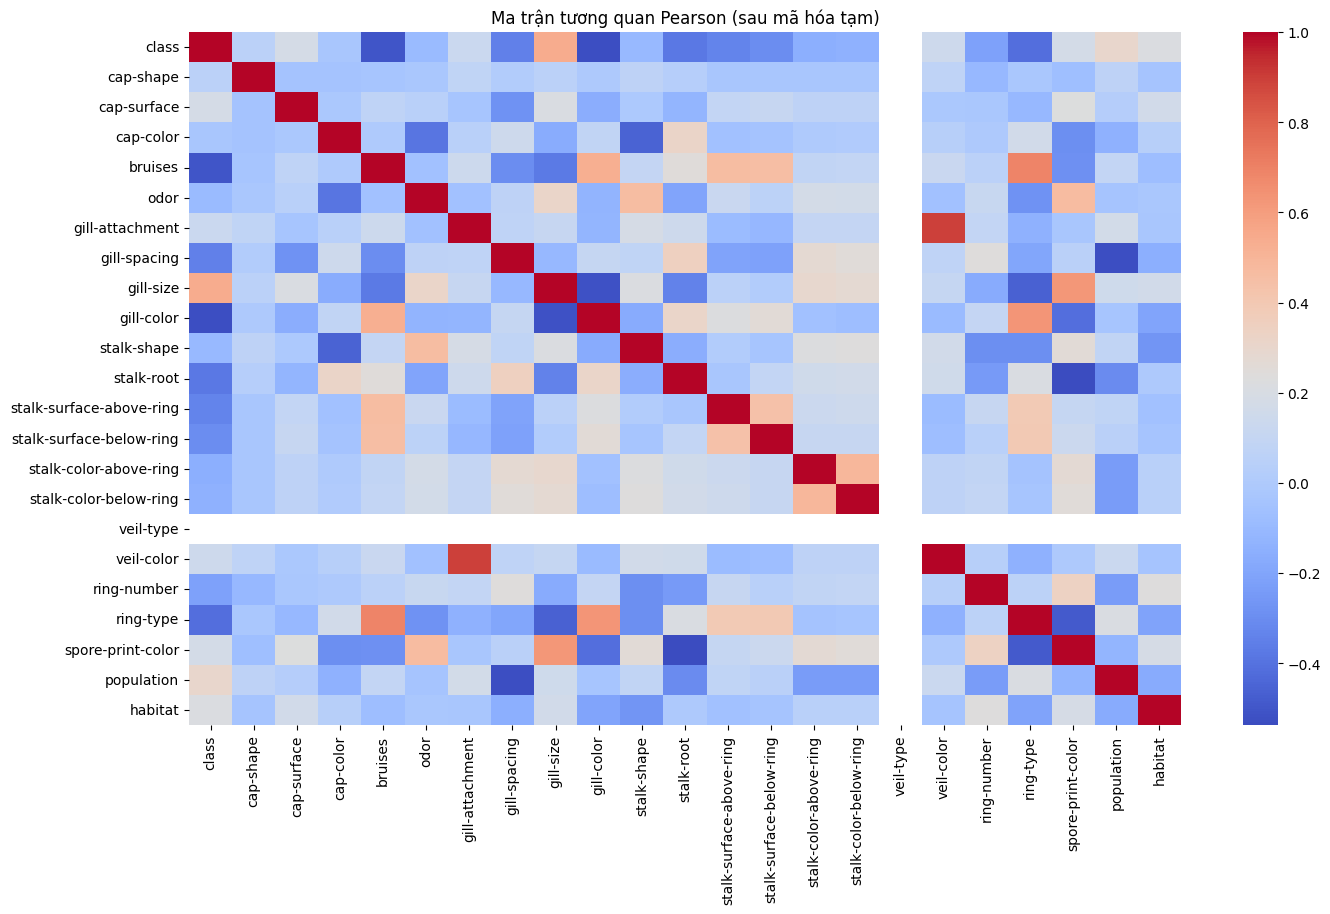

In [8]:
df_temp = df_clean.drop(columns=['dataset'])
df_encoded = df_temp.apply(lambda col: col.astype('category').cat.codes)

plt.figure(figsize=(16, 9))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
print('Nguyễn Thị Tường Vi - 6351071077')
plt.title('Ma trận tương quan Pearson (sau mã hóa tạm)')
plt.show()


**4**

In [9]:
features = df_clean.drop('class', axis=1)
labels = df_clean['class']

**5**

In [10]:
print('Nguyễn Thị Tường Vi - 6351071077')
features.select_dtypes(exclude=['int64']).columns



Nguyễn Thị Tường Vi - 6351071077


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'dataset'],
      dtype='object')

In [11]:

print('Nguyễn Thị Tường Vi - 6351071077')
features_onebot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onebot

Nguyễn Thị Tường Vi - 6351071077


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,dataset_all
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
8120,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
8122,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True


**6**

In [12]:
print('Nguyễn Thị Tường Vi - 6351071077')
X_train, X_test, y_train, y_test = train_test_split(
    features_onebot, labels, test_size=0.30, random_state=0, stratify=labels )
print("Train:", len(X_train))
print("Test :", len(X_test))

Nguyễn Thị Tường Vi - 6351071077
Train: 5686
Test : 2438


**7**

In [13]:
print('Nguyễn Thị Tường Vi - 6351071077')
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)


Nguyễn Thị Tường Vi - 6351071077


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
print('Nguyễn Thị Tường Vi - 6351071077')
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Nguyễn Thị Tường Vi - 6351071077
Accuracy: 0.9987694831829368
Report:               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:

tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Nguyễn Thị Tường Vi - 6351071077


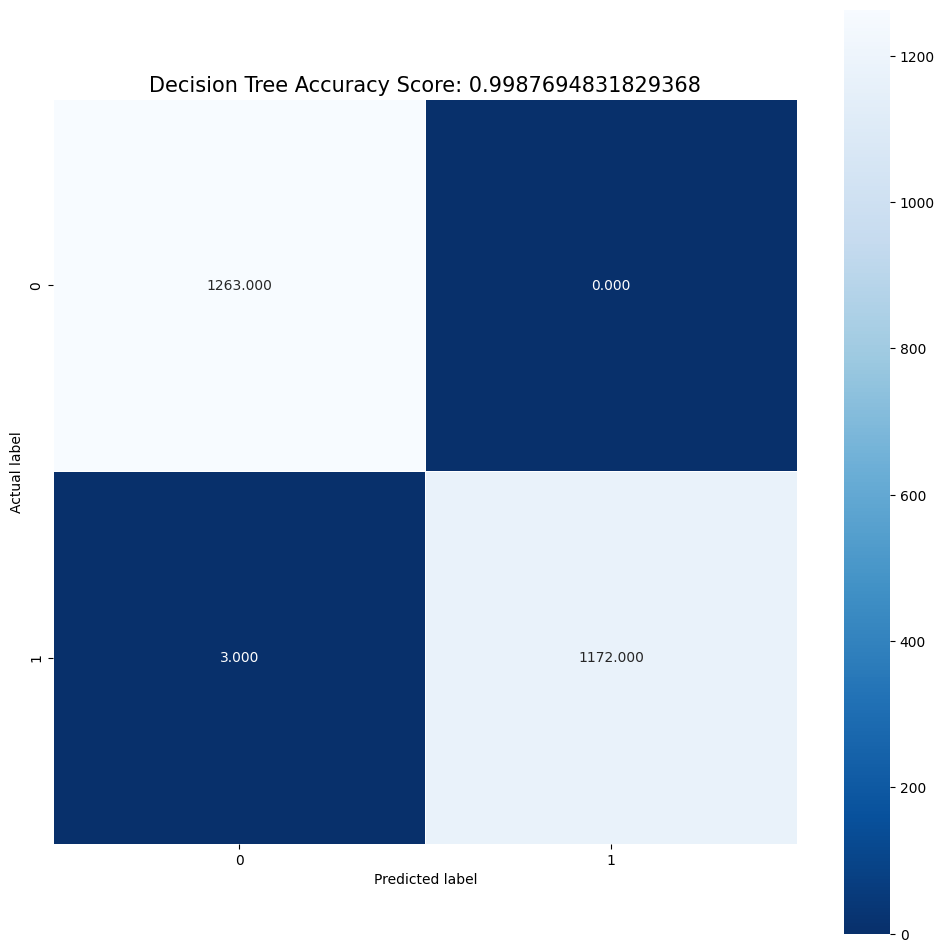

In [16]:
print('Nguyễn Thị Tường Vi - 6351071077')
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Decision Tree Accuracy Score: {tree_score}', size=15)
plt.show()


Nguyễn Thị Tường Vi - 6351071077


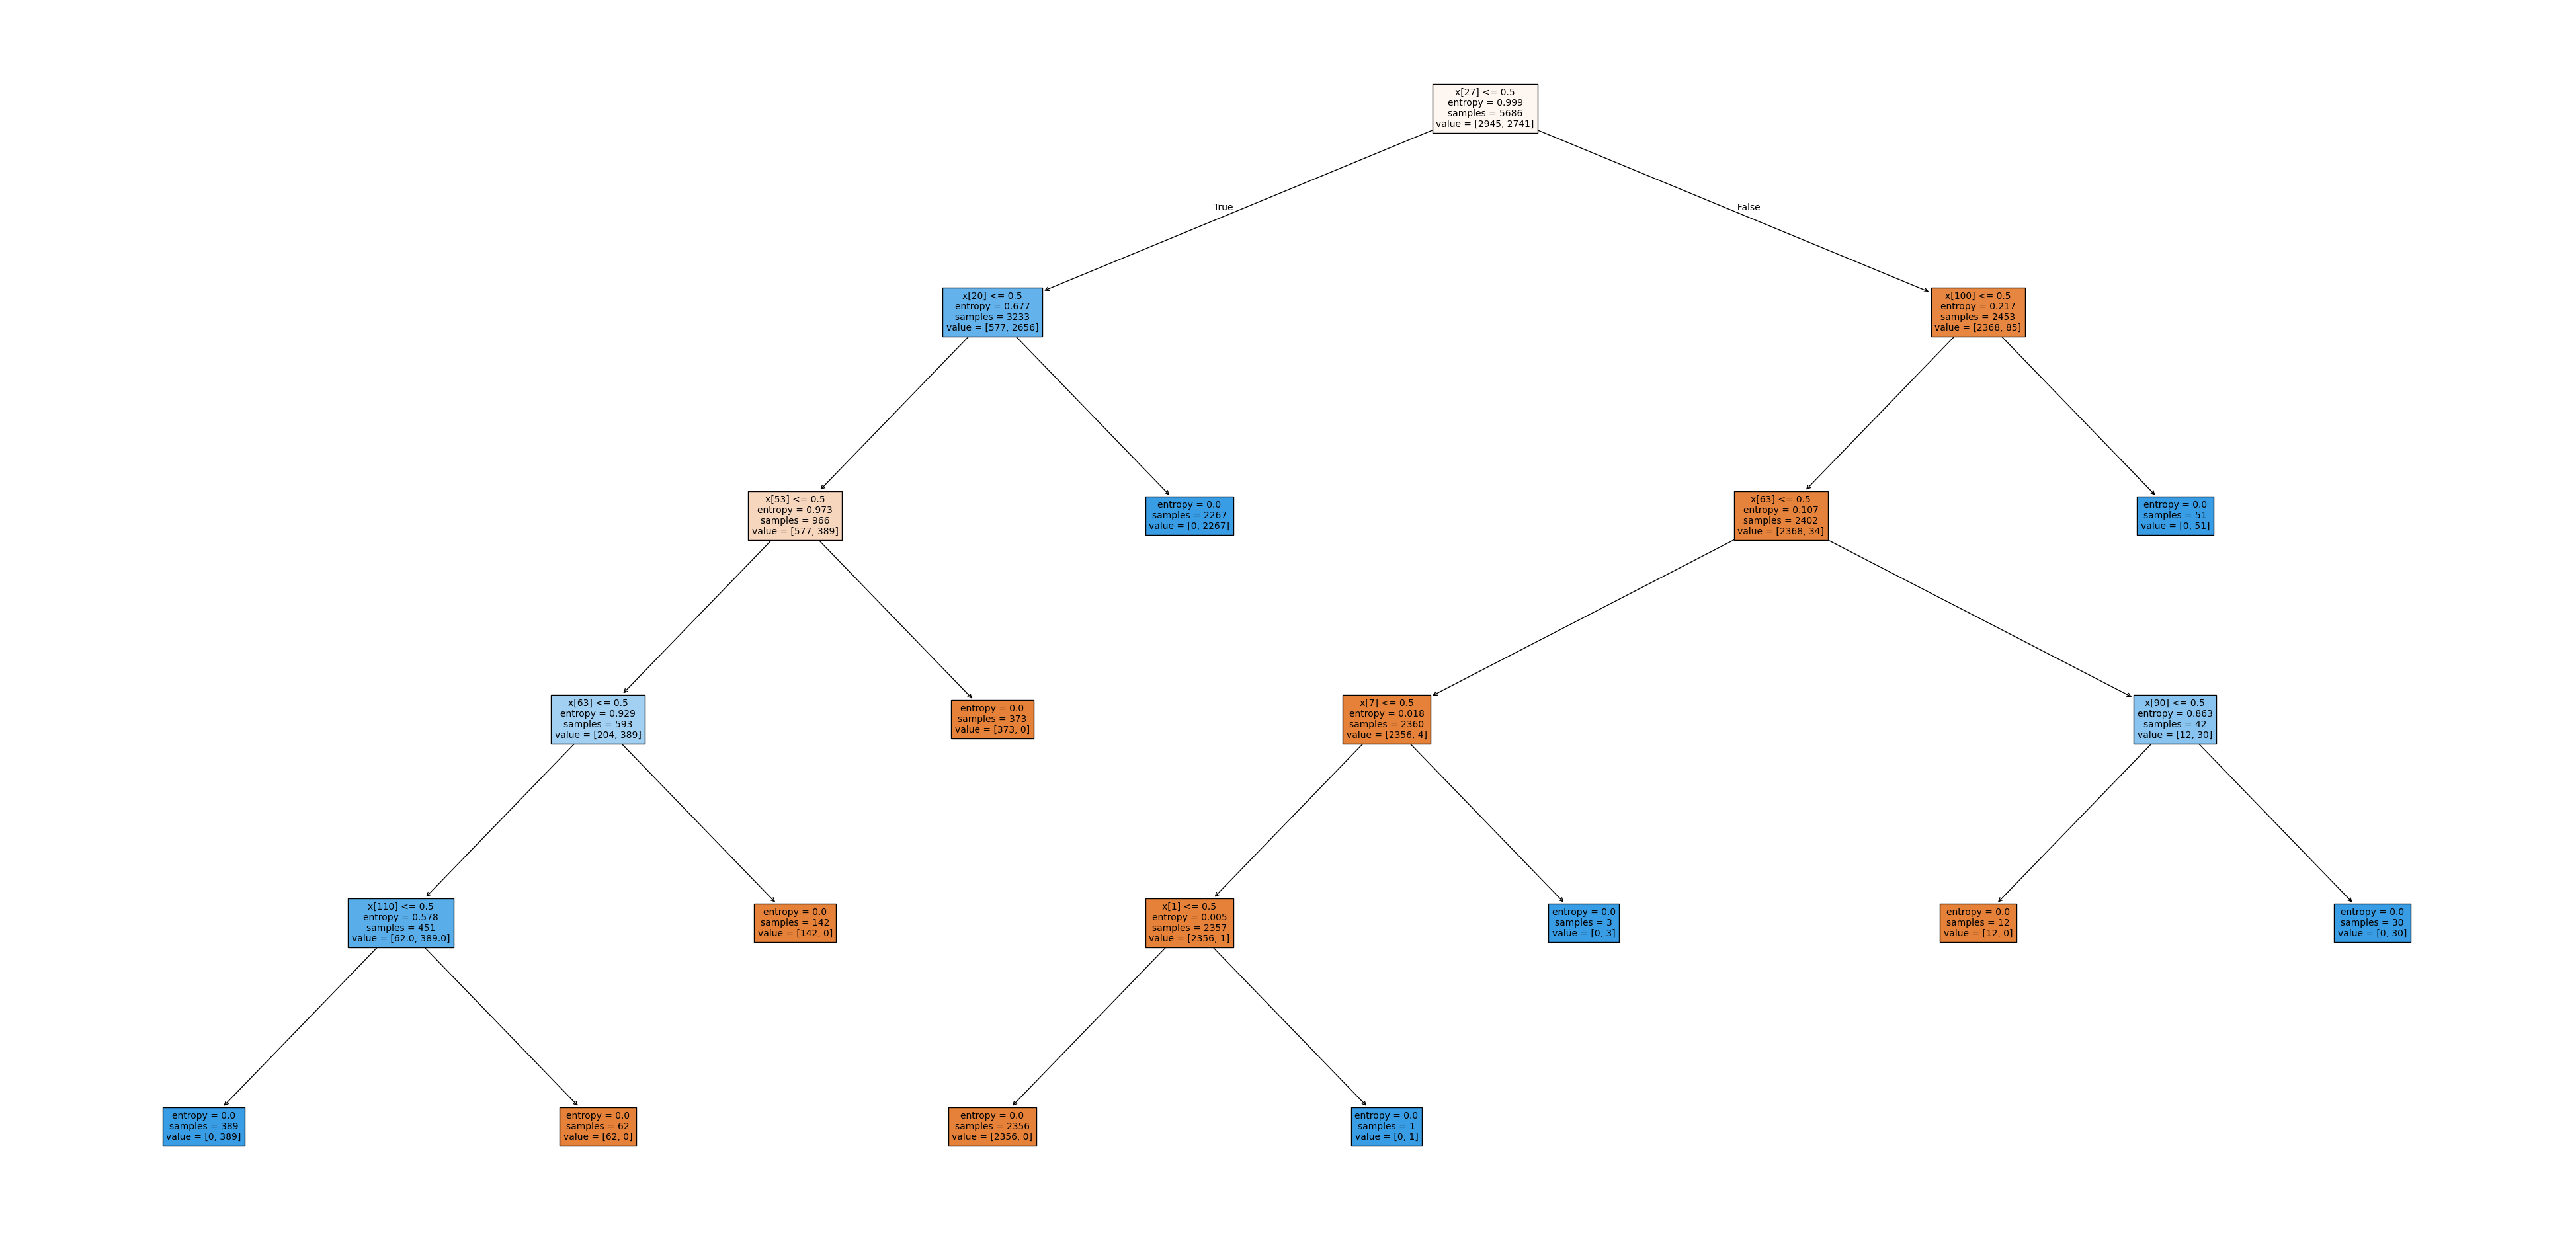

In [17]:
print('Nguyễn Thị Tường Vi - 6351071077')
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

**8**

In [18]:
print('Nguyễn Thị Tường Vi - 6351071077')
model_cart = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model_cart.fit(X_train, y_train)

y_pred_cart = model_cart.predict(X_test)
print("--- Kết quả Mô hình Cây CART ---")
print(metrics.classification_report(y_test, y_pred_cart))



Nguyễn Thị Tường Vi - 6351071077
--- Kết quả Mô hình Cây CART ---
              precision    recall  f1-score   support

           e       1.00      0.99      0.99      1263
           p       0.99      1.00      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Nguyễn Thị Tường Vi - 6351071077


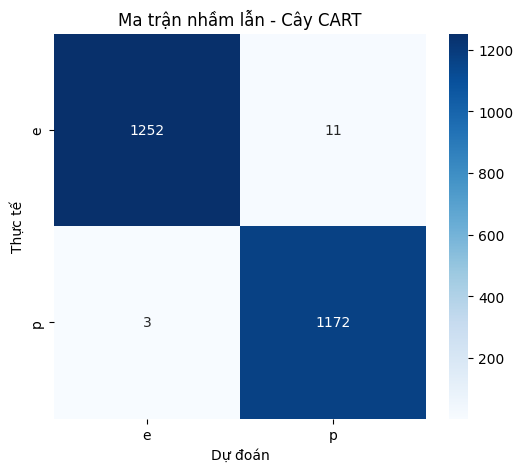

In [19]:
print('Nguyễn Thị Tường Vi - 6351071077')
cm_cart = metrics.confusion_matrix(y_test, y_pred_cart)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_cart.classes_, yticklabels=model_cart.classes_)
plt.title('Ma trận nhầm lẫn - Cây CART')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

Nguyễn Thị Tường Vi - 6351071077


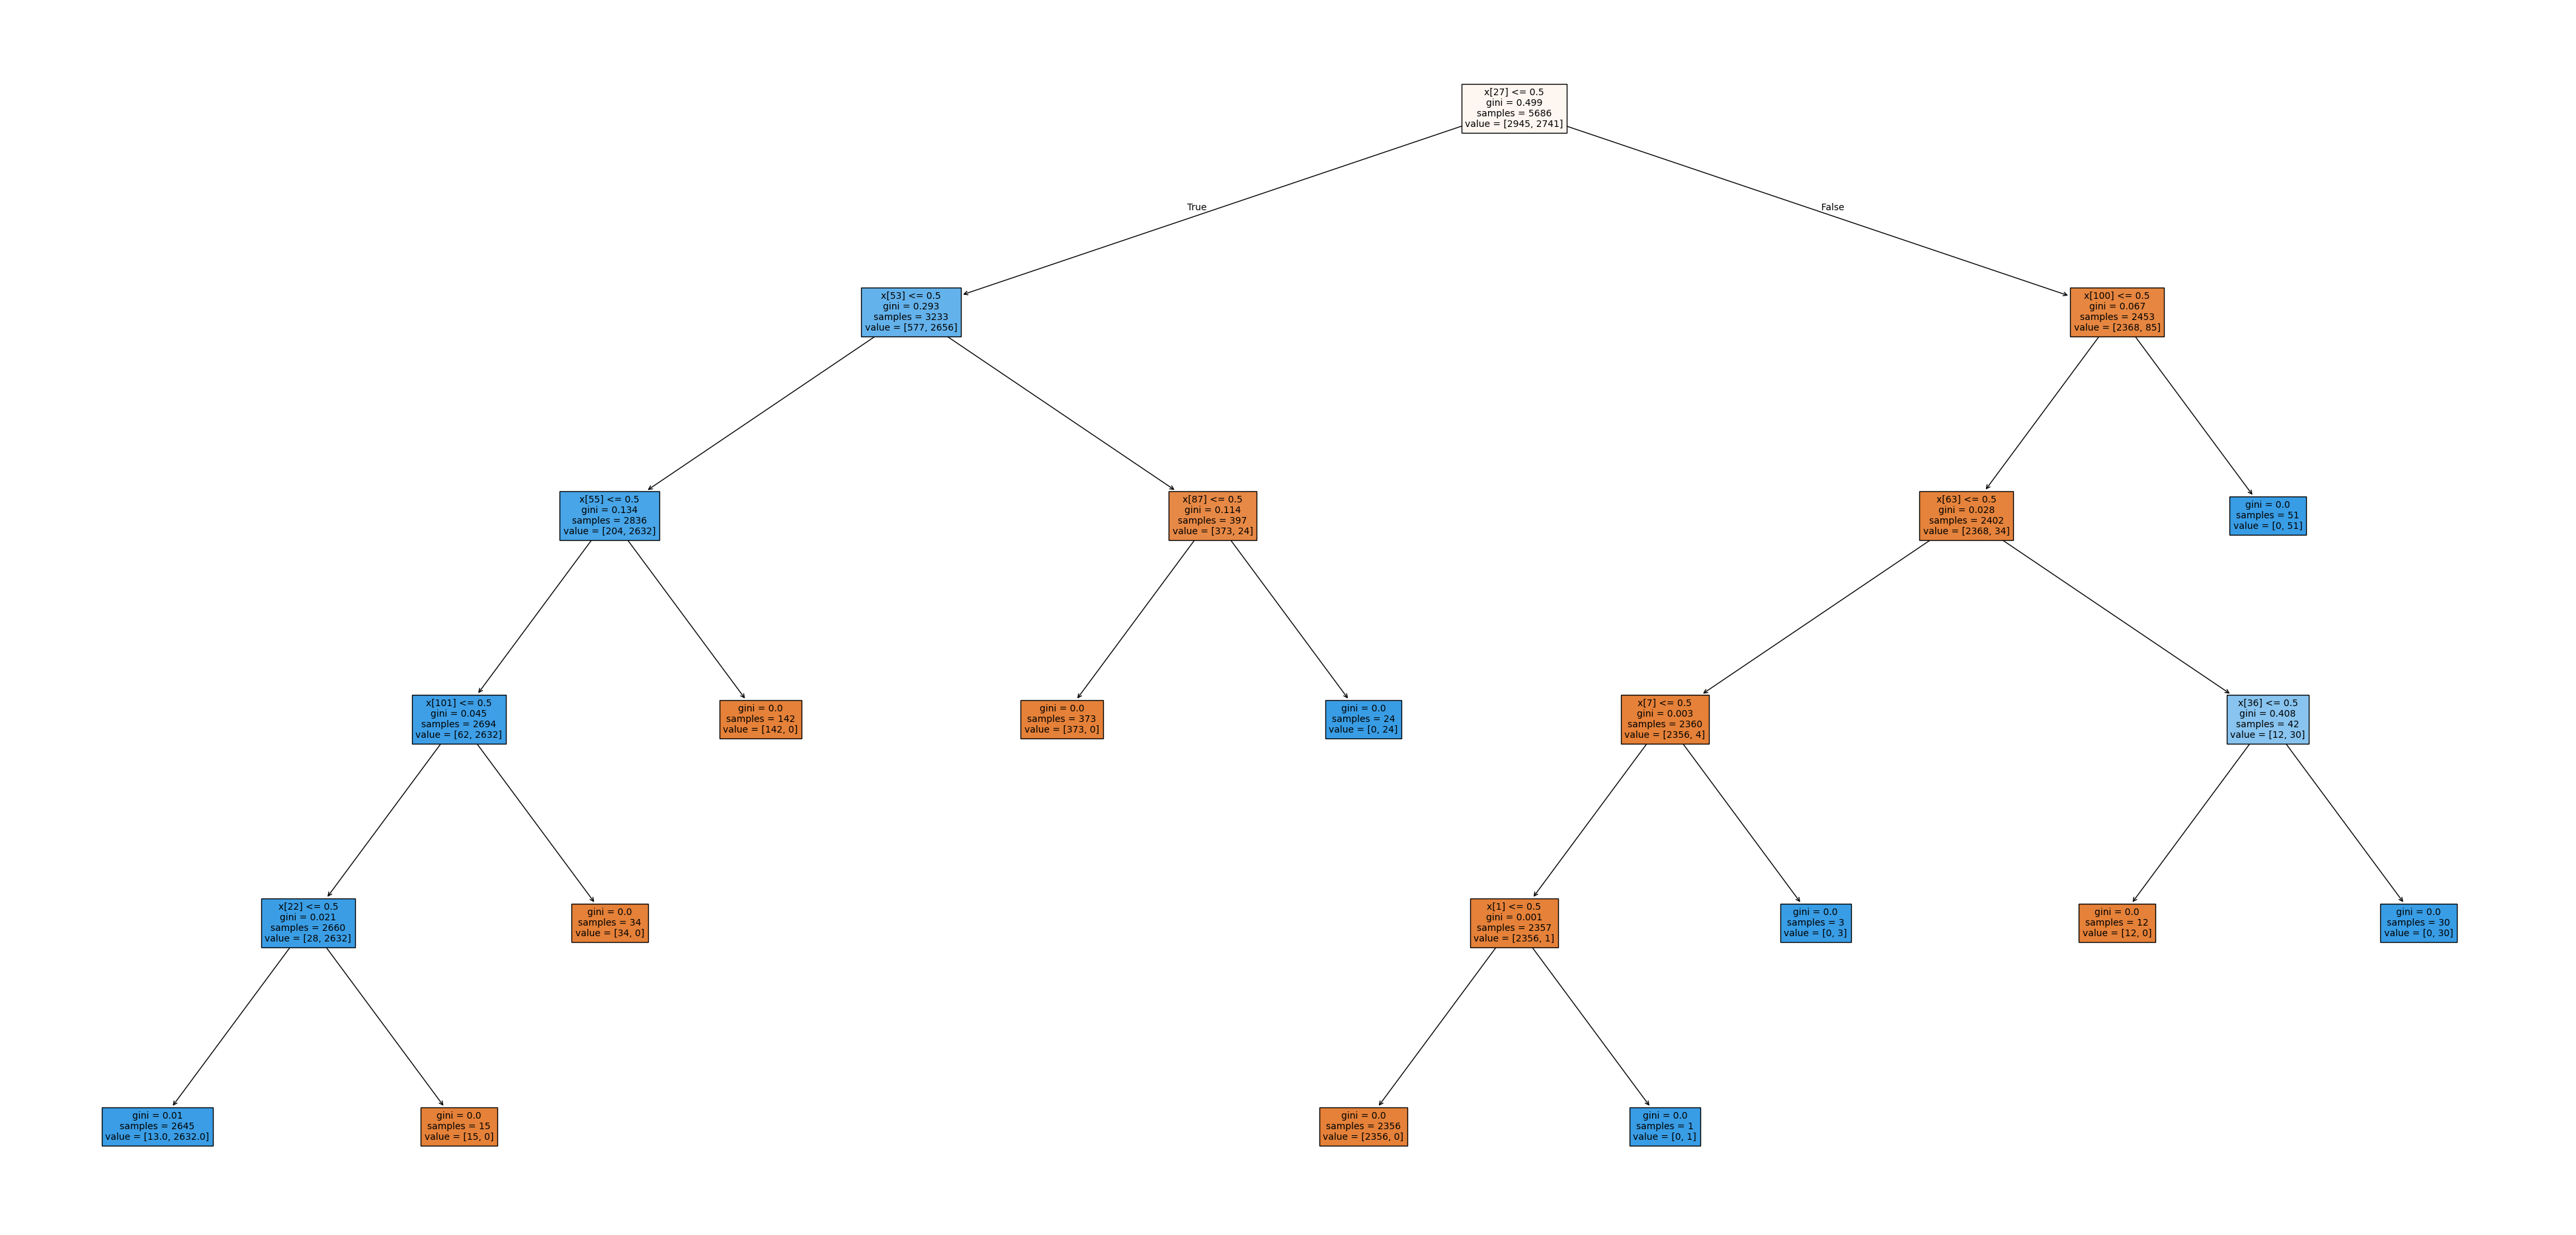

In [20]:
print('Nguyễn Thị Tường Vi - 6351071077')
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(model_cart, filled=True, fontsize=10)
plt.savefig('decision_tree_cart', dpi=100)
plt.show()


**9**

In [21]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


In [22]:
print('Nguyễn Thị Tường Vi - 6351071077')
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Nguyễn Thị Tường Vi - 6351071077
Accuracy: 0.9487284659557014
Report:               precision    recall  f1-score   support

           e       1.00      0.90      0.95      1263
           p       0.91      1.00      0.95      1175

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



Nguyễn Thị Tường Vi - 6351071077


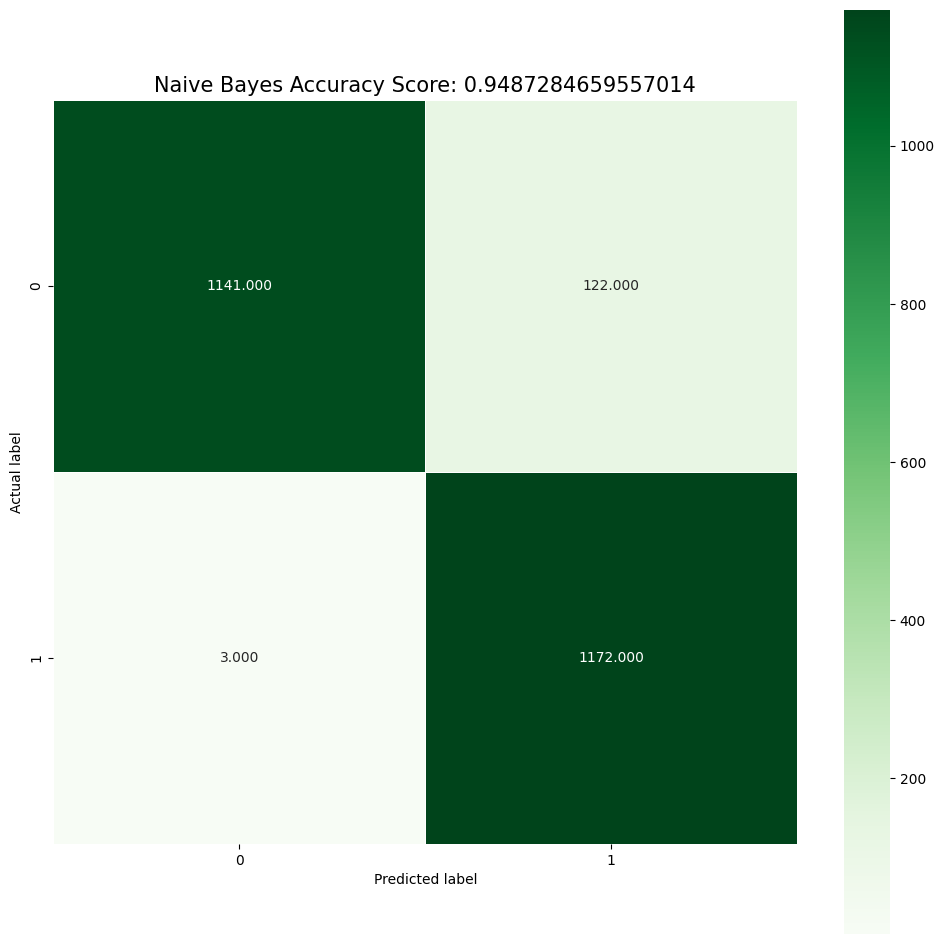

In [23]:
print('Nguyễn Thị Tường Vi - 6351071077')
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Naive Bayes Accuracy Score: {bayes_score}', size=15)
plt.show()